## Feature Engineering


Let's first check the shape of the dataset, how many rows and colums are there.

Making a copy of the dataset first to make sure the original data doesn't change at any stage.

In [9]:
import pandas as pd

dataset = pd.read_csv("train.csv")

df = dataset.copy()
# df.head()
df.shape

(1460, 81)

```py
import pandas as pd

dataset = pd.read_csv("train.csv")

df = dataset.copy()

# df.head()

df.shape()
```
this won't run because shape is not a method but rather an attribute of df.

### How to check the attributes and methods an object has

Object Exploration: Use the built-in dir() function to list all attributes and methods of an object. However, keep in mind that this might give you a long list to sift through.

print(dir(my_object))


## Let's first check for nan values and handle them as soon as possible

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [25]:
cv = df.isnull().sum()
print(cv)
# df.describe()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [26]:
import seaborn as sns

## Heatmap

Creating a heatmap to check for null values in each columns and managing them as required.

<AxesSubplot:>

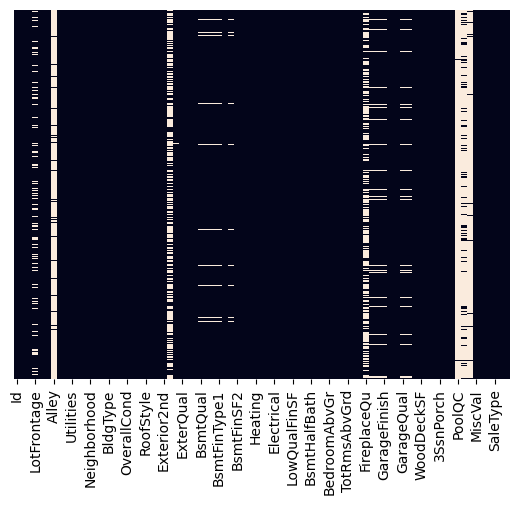

In [28]:
sns.heatmap(df.isnull(), yticklabels=False,cbar = False)

In [35]:
# df.info()
df.columns[df.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

shows columns with missing values but remember doesn't show columns sum of missing values like df.isnull().sum() yet


### Lets see all the columns with missing values along with the number of missing values.

In [49]:
df.columns[df.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

 Let's check  number of columns that have missing values in them.

In [72]:
df.isnull().any().sum()

19

To check number of missing values in columns.

In [75]:
print(df.isnull().sum()[df.isnull().any()])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


To know the mean, std and other things of the columns that have missing values in them. for better understanding of what to put inplace of missing values we can do this.


In [83]:
# print(df.isnull().sum()[df.isnull().any()].describe())
print(df[df.columns[df.isnull().any()]].describe())

       LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000


To know the Datatypes of each missing columns we can do this:

In [86]:
print(df.dtypes[df.isnull().any()])

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [88]:
# df.isnull().any().sum() 
df.isnull().sum()[df.isnull().any()]
# print((690/1460)*100)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64